In [1]:
# all required imports
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import statistics
import math
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

In [2]:
collist = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_70', 'feature_71', 'feature_72', 'feature_73', 'feature_74', 'feature_75', 'feature_76', 'feature_77', 'feature_78', 'feature_79', 'feature_80', 'feature_81', 'feature_82', 'feature_83', 'feature_84', 'feature_85', 'feature_86', 'feature_87', 'feature_88', 'feature_89', 'feature_90', 'feature_91', 'feature_92', 'feature_93', 'feature_94', 'feature_95', 'feature_96', 'feature_97', 'feature_98', 'feature_99', 'feature_100', 'feature_101', 'feature_102', 'feature_103', 'feature_104', 'feature_105', 'feature_106', 'feature_107', 'feature_108', 'feature_109', 'feature_110', 'feature_111', 'feature_112', 'feature_113', 'feature_114', 'feature_115', 'feature_116','latitude','longitude']

data = pd.read_csv("./dataset/default_plus_chromatic_features_1059_tracks (copy).csv",names = collist) 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Columns: 118 entries, feature_1 to longitude
dtypes: float64(118)
memory usage: 976.4 KB


In [ ]:
data.shape

In [ ]:

data.head()

In [ ]:
data.describe()

In [ ]:
num_cols = data._get_numeric_data().columns
print("Numerical Columns",num_cols)
cat_cols=list(set(data.columns) - set(num_cols))
print("Categorical Columns:",cat_cols)



### Outliers

In [ ]:
z_scores = np.abs(stats.zscore(data))

threshold =3

print(np.where(z_scores > 3))

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data["latitude"], data["longitude"])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

In [ ]:
refined_data = data[(z_scores < 3).all(axis=1)]

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(refined_data["latitude"], refined_data["longitude"])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

### IQR 


In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
# print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

In [ ]:
data_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
data_iqr.shape

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_iqr["latitude"], data_iqr["longitude"])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')

In [18]:
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

X = data.iloc[:, 0:116].values
y = data.iloc[:,116:118].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [19]:
y
y.shape

(1059, 2)

## K-means

In [ ]:
n_clusters = 33
kmeans = KMeans(n_clusters=n_clusters, max_iter = 500, algorithm='full')
kmeans = kmeans.fit(y)
labels = kmeans.predict(y)
centroids = kmeans.cluster_centers_
print(centroids)
print(labels)

In [ ]:
label_color = [matplotlib.cm.nipy_spectral(float(l) /n_clusters) for l in labels]
plt.scatter(y[:, 1], y[:, 0], c = label_color, s=25)
plt.title("Clustered regions by coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
plt.rcParams["figure.figsize"] = (20,5)

dbs = DBSCAN(eps=3, min_samples=2).fit(y)
core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
dbs_labels = dbs.labels_

n_clusters_ = len(set(dbs_labels)) - (1 if -1 in dbs_labels else 0)
n_noise_ = list(dbs_labels).count(-1)
print(n_clusters_
     )

In [ ]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


## Factor Analysis

In [ ]:
from factor_analyzer import FactorAnalyzer

In [ ]:
df = df + +0.00001*np.random.rand(1059, 118)
fa = FactorAnalyzer(rotation = None)
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

In [ ]:
df = df
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
fa = FactorAnalyzer(n_factors = 20,rotation = "varimax")
fa.fit(df)
       


In [ ]:
fa.loadings_

In [ ]:
fa.get_factor_variance()

## Graphs


In [ ]:

import numpy as np 
import statsmodels.api as sm 
import pylab as py 
  
# np.random generates different random numbers 
# whenever the code is executed 
# Note: When you execute the same code  
# the graph look different than shown below. 
  
# Random data points generated 
# data_points = np.random.normal(0, 1, 100)     
  
sm.qqplot(data["feature_4"], line ='45') 
py.show() 

In [ ]:
sm.qqplot(data["feature_5"], line ='45') 
py.show() 

In [ ]:
sm.qqplot(data["feature_25"], line ='45') 
py.show() 

In [ ]:
sm.qqplot(data["feature_65"], line ='45') 
py.show() 

## HISTOGRAMS

In [ ]:
plt.hist(data["feature_1"] , bins =100)

In [ ]:
plt.hist(data["feature_19"] , bins =100)

In [ ]:
plt.hist(data["feature_63"] , bins =100)

In [ ]:
plt.hist(data["feature_45"] , bins =100)

plt.hist(data["feature_38"] , bins =100)

## Pearson Correlation Test


In [ ]:

from scipy.stats import pearsonr
sample1 = data.sample(frac=0.5, replace=True, random_state=1)
sample2 = data.sample(frac=0.5, replace=True, random_state=2)

In [ ]:
corr , p = pearsonr(sample1["feature_1"] ,sample2["feature_2"])

In [ ]:
from scipy.stats import ttest_rel
stat, p = ttest_rel(sample1, sample2)
if p.all() > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Analysis of Variance Test (ANOVA)

In [ ]:
from scipy.stats import f_oneway
stat, p = f_oneway(sample1, sample2)
# print('stat=%.3f, p=%.3f' % (stat, p))
if p.all() > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

Test for Equal variances

In [ ]:
from scipy.stats import levene

levene(sample1["feature_1"],sample2["feature_2"])

# Estimators

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.8, random_state=1234)

X_scaler = StandardScaler().fit(X)


scaled_Xtrain = X_scaler.transform(Xtrain)
scaler = StandardScaler()
scaled_Xtest = X_scaler.transform(Xtest)
print(scaled_Xtest.shape)
print(ytrain.shape)

(848, 116)
(211, 2)


In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
# from sklearn.grid_search import ParameterGrid
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

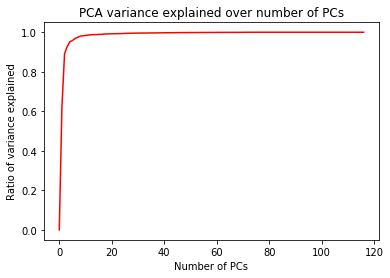

In [6]:
PCA_var = PCA(n_components = X_scaler.transform(X).shape[1])
PCA_var.fit(X_scaler.transform(X))
PCA_var_exp = [1 - x/sum(PCA_var.explained_variance_) for x in PCA_var.explained_variance_]

PCA_var_exp.insert(0, 0)

plt.figure()
plt.title("PCA variance explained over number of PCs")
plt.xlabel("Number of PCs")
plt.ylabel("Ratio of variance explained")
plt.plot(range(0, len(PCA_var_exp), 1), PCA_var_exp, c = 'r')
plt.show()

## Feature Selection

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, ParameterGrid
# from sklearn.grid_search import ParameterGrid
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression



Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1234)

estimators = {}

estimators['svc'] = SVC
estimators['rfc'] = RandomForestClassifier
estimators['logreg'] = LogisticRegression

params = {}
params['svc'] = {'kernel': ['linear'], 'C': [10**x for x in range(-1, 3, 1)], 
                 'gamma': [10**x for x in range(-1, 2, 1)], 
                'random_state': [1234]}
params['rfc'] = {'n_estimators': [5*x for x in range(3, 5, 1)]}

params['logreg'] = {'C': [10**x for x in range(-1, 3, 1)], 'penalty': ['l1', 'l2']}

rfe_best_model = {}
pca_best_model = {}
                          

for i, estimator in enumerate(estimators):
    model_params = ParameterGrid(params[estimator])
    grid = model_params
    
    rfe_best_model[estimator] = []
    pca_best_model[estimator] = []
    
    for n_comps in range(1, scaled_Xtrain.shape[1], 1):
        rfe_best_model[estimator].append(0)
        pca_best_model[estimator].append(0)
            
        for params_combo in grid:
        
            estimator_iter = estimators[estimator]
            estimator_iter = estimator_iter(**params_combo)

            rfe = RFE(estimator = estimator_iter, n_features_to_select=n_comps)
            rfe.fit(scaled_Xtrain, ytrain)

            if (rfe.score(scaled_Xtest, ytest) > rfe_best_model[estimator][n_comps - 1]):
                rfe_best_model[estimator][n_comps - 1] = rfe.score(scaled_Xtest, ytest)
                
            PCA_model = PCA(n_components = n_comps)
            PCA_model.fit(scaled_Xtrain)
            PCA_Xtrain = PCA_model.transform(scaled_Xtrain)
            PCA_Xtest = PCA_model.transform(scaled_Xtest)
            
            estimator_iter.fit(PCA_Xtrain, ytrain)
            
            if (estimator_iter.score(PCA_Xtest, ytest) > pca_best_model[estimator][n_comps - 1]):
                pca_best_model[estimator][n_comps - 1] = estimator_iter.score(PCA_Xtest, ytest)

    plt.figure()
    plt.xlabel("%s - Number of features selected" % estimator)
    plt.ylabel("Accuracy score")
    plt.plot(range(1, len(pca_best_model[estimator]) + 1, 1), pca_best_model[estimator], c = 'r')
    plt.plot(range(1, len(rfe_best_model[estimator]) + 1, 1), rfe_best_model[estimator], c = 'b')
    plt.show()

ValueError: bad input shape (847, 2)

In [ ]:
rfe_best_model_2 = {}
pca_best_model_2 = {}

rfe_best_model_2['svc'] = []
rfe_best_model_2['rfc'] = []
rfe_best_model_2['logreg'] = []

accuracies = {}

accuracies['svc'] = [0]
accuracies['rfc'] = [0]

accuracies['logreg'] = [0]

features = {}

features['svc'] = []
features['rfc'] = []
features['logreg'] = []

estimator_list = []

n_comps = 20
                          
for i, estimator in enumerate(estimators):
    
    estimator_list.append(estimator)
    model_params = ParameterGrid(params[estimator])
    grid = model_params
    
    rfe_best_model_2[estimator] = []
    
    rfe_best_model_2[estimator].append(0)
    #pca_best_model_2[estimator].append(0)

    for params_combo in grid:
        estimator_iter = estimators[estimator]
        estimator_iter = estimator_iter(**params_combo)

        rfe = RFE(estimator = estimator_iter, n_features_to_select=n_comps)
        rfe.fit(scaled_Xtrain, ytrain)

        if (rfe.score(scaled_Xtest, ytest) > accuracies[estimator][0]):
            accuracies[estimator][0] = [rfe.score(scaled_Xtest, ytest)]
            features[estimator] = rfe.support_


In [ ]:
import pandas as pd

est_columns = ['SVC','RFC','Log_Reg'] 
est_index = ['feature_%d'%i for i in range(0,len(features['svc']))]

# display format as scientific 
pd.options.display.float_format = '{:,.4g}'.format
est_df = pd.DataFrame(index=est_index, columns=est_columns)
est_df

for i in range(0, len(features['svc'])):
    est_df.iloc[i, 0] = features['svc'][i]
    est_df.iloc[i, 1] = features['rfc'][i]
    est_df.iloc[i, 2] = features['logreg'][i]
    
print('Features used by any Estimator')
est_df[est_df['SVC'] | est_df['RFC'] | est_df['Log_Reg']]

In [ ]:
print('Features used by all Estimators')
est_df[est_df['SVC'] & est_df['RFC'] & est_df['Log_Reg']]

In [ ]:
from sklearn.feature_selection import RFE

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.8, random_state=1234)

rfc = RandomForestClassifier(n_estimators=35)

rfe = RFE(estimator = rfc, n_features_to_select=20)
rfe.fit(Xtrain, ytrain)
X_reduced = rfe.transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, y, test_size=0.8, random_state=1234)

In [ ]:
X_reduced.shape

## Model Building

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

estimators = {}

estimators['svc'] = SVC
estimators['rfc'] = RandomForestClassifier
estimators['knn'] = KNeighborsClassifier
# estimators['logreg'] = LogisticRegression

params = {}
params['svc'] = {'kernel': ['linear'], 'C': [10**x for x in range(-2, 3, 1)], 
                 'gamma': [10**x for x in range(-2, 3, 1)], 
                'random_state': [1234]}
params['rfc'] = {'n_estimators': [5*x for x in range(1, 8, 1)]}

params['knn'] = {'n_neighbors': range(1, 15, 1), 'p': [1, 2]}
# params['logreg'] = {'C': [10**x for x in range(-1, 3, 1)], 'penalty': ['l1', 'l2']}

best_model = {}

for i, estimator in enumerate(estimators):
    model_params = ParameterGrid(params[estimator])
    grid = model_params
    
    best_model[estimator] = [0]
    
    for params_combo in grid:
        
        estimator_iter = estimators[estimator]
        estimator_iter = estimator_iter(**params_combo)
            
        estimator_iter.fit(Xtrain, ytrain)
        scores = cross_val_score(estimator_iter, Xtrain, ytrain, cv = 10, scoring='accuracy') # smallest class has 2 members
        
        if (scores.mean() > best_model[estimator][0]):
            best_model[estimator] = [scores.mean(), estimator_iter.get_params]

    print("For %s the best cv accuracy score is %s" % (estimator, best_model[estimator][0]))

## Reclustering

In [ ]:
with open('../data/default_features_1059_tracks.txt', newline='') as inputfile:
    data = list(csv.reader(inputfile))
    
data = np.asarray(data)
data.shape

y_coords = data[:, 68:70]
y_coords = y_coords.astype(dtype = np.float)

n_clusters = range(2, 33, 1)

accuracies = {'svc':[], 'rfc':[], 'knn':[]}

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, max_iter = 300, algorithm='full')
    kmeans = kmeans.fit(y_coords)
    labels = kmeans.predict(y_coords)
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, labels, test_size=0.8, random_state=1234)

    best_model = {}

    for i, estimator in enumerate(estimators):
        model_params = ParameterGrid(params[estimator])
        grid = model_params

        best_model[estimator] = [0]
        #accuracies[estimator] = []

        for params_combo in grid:

            estimator_iter = estimators[estimator]
            estimator_iter = estimator_iter(**params_combo)

            #estimator_iter.fit(Xtrain, ytrain)
            scores = cross_val_score(estimator_iter, Xtrain, ytrain, cv = 10, scoring='accuracy') # smallest class has 2 members

            if (scores.mean() > best_model[estimator][0]):
                best_model[estimator] = [scores.mean(), estimator_iter.get_params]

        accuracies[estimator].append(best_model[estimator][0])

In [ ]:
plt.figure()
plt.xlabel("Number of clusters")
plt.ylabel("Mean cross validation score")
plt.title("Accuracy for different number of location clusters")
plt.plot(range(2, len(accuracies['knn']) + 2),accuracies['knn'], c = 'r')
plt.plot(range(2, len(accuracies['svc']) + 2),accuracies['svc'], c = 'b')
plt.plot(range(2, len(accuracies['rfc']) + 2),accuracies['rfc'], c = 'g')
plt.show()

In [ ]:
with open('../data/default_features_1059_tracks.txt', newline='') as inputfile:
    data = list(csv.reader(inputfile))
    
data = np.asarray(data)
data.shape

y_coords = data[:, 68:70]
y_coords = y_coords.astype(dtype = np.float)

n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, max_iter = 500, algorithm='full')
kmeans = kmeans.fit(y_coords)
labels = kmeans.predict(y_coords)

#print('Centroids')
centroids = kmeans.cluster_centers_
#print(centroids)

plt.style.use('ggplot')
label_color = [matplotlib.cm.nipy_spectral(float(l) /n_clusters) for l in labels]
plt.scatter(y_coords[:, 1], y_coords[:, 0], c = label_color, s=25)
plt.title("Clustered regions by coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

In [ ]:
best_model

In [ ]:
with open('../data/default_features_1059_tracks.txt', newline='') as inputfile:
    data = list(csv.reader(inputfile))
    
data = np.asarray(data)
data.shape

y_coords = data[:, 68:70]
y_coords = y_coords.astype(dtype = np.float)

n_clusters = 7

accuracies = {'svc':[], 'rfc':[], 'knn':[]}

kmeans = KMeans(n_clusters=n_clusters, max_iter = 300, algorithm='full')
kmeans = kmeans.fit(y_coords)
labels = kmeans.predict(y_coords)

Xtrain, Xtest, ytrain, ytest = train_test_split(X_reduced, labels, test_size=0.8, random_state=1234)

best_model = {}

for i, estimator in enumerate(estimators):
    model_params = ParameterGrid(params[estimator])
    grid = model_params

    best_model[estimator] = [0]
    #accuracies[estimator] = []

    for params_combo in grid:

        estimator_iter = estimators[estimator]
        estimator_iter = estimator_iter(**params_combo)
        estimator_iter.fit(Xtrain, ytrain)
        #estimator_iter.fit(Xtrain, ytrain)
        scores = cross_val_score(estimator_iter, Xtest, ytest, cv = 10, scoring='accuracy') # smallest class has 2 members

        if (scores.mean() > best_model[estimator][0]):
            best_model[estimator] = [scores.mean(), estimator_iter.get_params, estimator_iter.predict(Xtest)]
            best_model[estimator].append(params_combo)

    accuracies[estimator].append(best_model[estimator][0])

In [ ]:
acc_index = ['Accuracy Score', 'parameters', 'parameter values'] 
acc_columns = ['SVC', 'Random Forest', 'KNN']

# display format as scientific 
pd.options.display.float_format = '{:,.4g}'.format
acc_df = pd.DataFrame(index=acc_index, columns=acc_columns)
#est_df

acc_df.iloc[0, 0] = best_model['svc'][0]
acc_df.iloc[0, 1] = best_model['rfc'][0]
acc_df.iloc[0, 2] = best_model['knn'][0]
acc_df.iloc[1, 0] = list(best_model['svc'][3])
acc_df.iloc[1, 1] = list(best_model['rfc'][3])
acc_df.iloc[1, 2] = list(best_model['knn'][3])
acc_df.iloc[2, 0] = list(best_model['svc'][3].values())
acc_df.iloc[2, 1] = list(best_model['rfc'][3].values())
acc_df.iloc[2, 2] = list(best_model['knn'][3].values())

acc_df

In [ ]:
plt.style.use('ggplot')
label_color = [matplotlib.cm.nipy_spectral(float(l) /n_clusters) for l in best_model['svc'][2]]
plt.scatter(y_coords[:, 1], y_coords[:, 0], c = label_color, s=25)
plt.title("Clustered regions by SVC classification (Accuracy score: %s)" % best_model['svc'][0])
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

In [ ]:
plt.style.use('ggplot')
label_color = [matplotlib.cm.nipy_spectral(float(l) /n_clusters) for l in best_model['knn'][2]]
plt.scatter(y_coords[:, 1], y_coords[:, 0], c = label_color, s=25)
plt.title("Clustered regions by KNN classification (Accuracy score: %s)" % best_model['knn'][0])
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

In [ ]:
plt.style.use('ggplot')
label_color = [matplotlib.cm.nipy_spectral(float(l) /n_clusters) for l in best_model['rfc'][2]]
plt.scatter(y_coords[:, 1], y_coords[:, 0], c = label_color, s=25)
plt.title("Clustered regions by Random Forest classification (Accuracy score: %s)" % best_model['rfc'][0])
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.figure()

In [ ]:
# import pandas as pd

results_columns = ['Geo', 'SVC','RFC','KNN'] 
results_index = ['obs_%d'%i for i in range(0,len(best_model['svc'][2]))]

# display format as scientific 
pd.options.display.float_format = '{:,.4g}'.format
results_df = pd.DataFrame(index=results_index, columns=results_columns)
results_df

for i in range(0, len(best_model['svc'][2])):
    results_df.iloc[i, 0] = ytest[i]
    results_df.iloc[i, 1] = best_model['svc'][2][i]
    results_df.iloc[i, 2] = best_model['rfc'][2][i]
    results_df.iloc[i, 3] = best_model['knn'][2][i]
    
correct_columns = ['SVC', 'RFC', 'KNN']
correct_index = ['Correct', 'Incorrect']

pd.options.display.float_format = '{:,.4g}'.format
correct_df = pd.DataFrame(index=correct_index, columns=correct_columns)
correct_df

for i in range(0, 3, 1):
    correct_df.iloc[0, i] = len(results_df[results_df['Geo'] == results_df.iloc[:, i+1]])
    correct_df.iloc[1, i] = len(results_df[results_df['Geo'] != results_df.iloc[:, i+1]])
    
correct_df

In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import BaggingClassifier
# # from sklearn.ensemble import RidgeClassifier
# from sklearn.linear_model import RidgeClassifier
# # Create classifiers
# seed = 1234
# rf = RandomForestClassifier()
# et = ExtraTreesClassifier()
# knn = KNeighborsClassifier()
# svc = SVC()
# rg = RidgeClassifier()
# clf_array = [rf, et, knn, svc]
# for clf in clf_array:
#     vanilla_scores = cross_val_score(clf, Xtest, ytest, cv=10, n_jobs=-1)
#     bagging_clf = BaggingClassifier(clf,max_samples=0.4, max_features=10, random_state=seed)
#     bagging_scores = cross_val_score(bagging_clf, X, y, cv=10,n_jobs=-1)
    
#     print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__, vanilla_scores.mean(), vanilla_scores.std()))
#     print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__,bagging_scores.mean(), bagging_scores.std()))

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = model_selection.KFold(n_splits=20,random_state=10)
cart = DecisionTreeClassifier()
num_trees = 200
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=10)
results = model_selection.cross_val_score(model, Xtest, ytest, cv=kfold)
print(results.mean())